### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel

from gate_variants.toffoli_variants import CCX_Variant_Gate 
from orientation_map import orientation_map_gen

from trios_bench.cnx_dirty import generate_dirty_multicontrol
from trios_bench.cnx_halfdirty import generate_cnx_halfdirty
from trios_bench.cnx_logdepth import generate_cnx_log_depth
from trios_bench.cnx_inplace import generate_cnx_inplace
from trios_bench.cuccaro_adder import generate_cuccaro_adder
from trios_bench.Takahashi_adder import generate_takahashi_adder
from trios_bench.incrementer_borrowedbit import generate_incrementer
from trios_bench.grovers_integer_search import generate_grover_integer_search_circuit

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
def cluster(k_inner, k_outer):
    coupling_map = []
    qid = 0
    for i in range(0, k_outer):
        for j in range(0, k_inner):
            qid += 1
            for j2 in range(1, j):
                coupling_map.append([qid-j2, qid])
        for i2 in range(0, i)
            coupling_map.append([(i2-1)*k_inner+1, (i-1)*k_inner+1])
        end
    end

### Load device and the device configuration object ###

In [3]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [4]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [5]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [6]:
from level3_context import _parse_transpile_args, level_3_context_pass_manager
from level3_context_pulse import level_3_pass_manager, level_3_orign_pulse_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [7]:
qc = generate_grover_integer_search_circuit(6, 3, 0, maxn=None, num_rounds=None)
qc.count_ops()

OrderedDict([('h', 102), ('x', 84), ('ccx', 84)])

In [27]:
qc0 = generate_dirty_multicontrol(6, 11)
qc1 = generate_cnx_halfdirty(19)
qc2 = generate_cnx_log_depth(19)
qc3 = generate_cnx_inplace(4)
qc4 = generate_cuccaro_adder(20)
qc5 = generate_takahashi_adder(20)
qc6 = generate_incrementer(5)
qc7 = generate_grover_integer_search_circuit(6, 3, 0, maxn=None, num_rounds=None)
qc_list = [qc0, qc1, qc2, qc3, qc4, qc5,qc6, qc7]

In [28]:
result_lists = []
for qc in qc_list:
    result_lists.append(generate_results(qc, pass_manager_config))

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18,

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  14 11 8
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
swap
successor swap two inters

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  14 11 8
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
swap
successor swap two inters

intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegiste

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: 

('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11

look for variant_rules ('01', '00', 'l0', 'p')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('01', '00', 'l2', 'p')
didn't find match tag
l2 ['01', '00', 'l2', 'p']
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '00', 'l0', 'p')
didn't find m

look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('02', '00', 'l2', 'p')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('01', '12', 'l1', 's')
final tag, two match ('01', '12', 'l1', 'p')
look for variant_rules ('02', '12', 'l2', 's')
final tag, three match ('20', '12', 'l2', 's')
look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one matc

('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 0)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
(

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  11 5 8
The required toffoli will be decomposed using an 8 cnot decomposition - 

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qu

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  11 5 8
The required toffoli will be decomposed using an 8 cnot decomposition - 

intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00'

('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
(

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(4, 'q'), 0),
2: Qubit(QuantumRegister(4, 'q'), 1),
1: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  4 1 0
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  4 

('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00

calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 2 0
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('00', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 2 0
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
initialized variant_tag: ('21', '00', 'l0', 'p')

look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look 

look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
l

('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(Qu

intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Q

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00

('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00

look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '12', 'l1', 's')
final tag, one match ('01', '12', 'l1', 'p')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q')

look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '02', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '12', 'l1', 's')
final tag, one match ('01', '12', 'l1', 'p')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8)]
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5

intersect [Qubit(QuantumRegister(27, 'q'), 13), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 10)]
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'

('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q'), 5),
13: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
9: Qubit(QuantumRegister(20, 'q'), 8),
12: Qubit(QuantumRegister(20, 'q'), 9),
8: Qubit(QuantumRegister(20, 'q'), 10),
10: Qubit(QuantumRegister(20, 'q'), 11),
6: Qubit(QuantumRegister(20, 'q'), 12),
5: Qubit(QuantumRegister(20, 'q'), 13),
7: Qubit(QuantumRegister(20, 'q'), 14),
3: Qubit(QuantumRegister(20, 'q'), 15),
4: Qubit(QuantumRegister(20, 'q'), 16),
2: Qubit(QuantumRe

('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11

look for variant_rules ('12', '02', 'l2', 's')
final tag, three match ('21', '02', 'l2', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('12', '02', 'l2', 's')
final tag, three match ('21', '02', 'l2', 's')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q'), 5),
13: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
9:

look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('12', '02', 'l2', 's')
final tag, three match ('21', '02', 'l2', 's')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8)]
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(

intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 18), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 18), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')


intersect [Qubit(QuantumRegister(27, 'q'), 21), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 11), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 12), Qubit(QuantumRegister(27, 'q'), 13)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 13)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 13), Qubit(Quantu

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
3: Qubit(QuantumRegister(5, 'q'), 0),
2: Qubit(QuantumRegister(5, 'q'), 1),
4: Qubit(QuantumRegister(5, 'q'), 2),
1: Qubit(QuantumRegister(5, 'q'), 3),
0: Qubit(QuantumRegister(5, 'q'), 4)
})
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decom

The physical qubits for the toffoli are:  1 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  2 3 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  2 3 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  1 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00',

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
3: Qubit(QuantumRegister(5, 'q'), 0),
2: Qubit(QuantumRegister(5, 'q'), 1),
4: Qubit(QuantumRegister(5, 'q'), 2),
1: Qubit(QuantumRegister(5, 'q'), 3),
0: Qubit(QuantumRegister(5, 'q'), 4)
})
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using

calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  2 3 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  2 3 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l0', 's'] ['21', '00', 'l0', 'p']
initialized variant_tag: ('00', '01', 'l0', 's')
The physical qubits for the toffoli are:  1 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
initialized variant_tag: ('21', '00', 'l2', 'p')

look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('21', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('02', '02', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('21', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('

('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
(

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(9, 'q'), 0),
6: Qubit(QuantumRegister(9, 'q'), 1),
5: Qubit(QuantumRegister(9, 'q'), 2),
7: Qubit(QuantumRegister(9, 'q'), 3),
3: Qubit(QuantumRegister(9, 'q'), 4),
4: Qubit(QuantumRegister(9, 'q'), 5),
2: Qubit(QuantumRegister(9, 'q'), 6),
1: Qubit(QuantumRegister(9, 'q'), 7),
0: Qubit(QuantumRegister(9, 'q'), 8)
})
The physical qubits for the toffoli are:  2 4 1
The required toffoli will be decomposed u

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(9, 'q'), 0),
6: Qubit(QuantumRegister(9, 'q'), 1),
5: Qubit(QuantumRegister(9, 'q'), 2),
7: Qubit(QuantumRegister(9, 'q'), 3),
3: Qubit(QuantumRegister(9, 'q'), 4),
4: Qubit(QuantumRegister(9, 'q'), 5),
2: Qubit(QuantumRegister(9, 'q'), 6),
1: Qubit(QuantumRegister(9, 'q'), 7),
0: Qubit(QuantumRegister(9, 'q'), 8)
})
The physical qubits for the toffoli are:  2 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center


('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00

initialized variant_tag: ('00', '01', 'l1', 's')
The physical qubits for the toffoli are:  2 1 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
ccx
calculated tags ['00', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
ccx
two intersection conditions True False
calculated tags ['00', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
swap
initialized variant_tag: ('00', '00', 'l1', 'p')
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions False False True
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
x
swap
initialized variant_tag: ('00', '00', 'l2', 'p')
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditio

look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '12', 'l1', 's')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match

initialized variant_tag: ('12', '00', 'l2', 'p')
The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
ccx
three intersection conditions False False True
three qargs Qubit(QuantumRegister(27, 'q'), 5) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 2)
calculated tags ['00', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
h
h
predecessor swap two intersection conditions:TrueFalse
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('00', '00', 'l1', 'p')
The physical qubits for the toffoli are:  10 7 6
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
ccx
two intersection conditions True False
calculated tags ['00', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
swap
successor swap two intersection conditions:TrueTrue
predecessor swap two intersection conditions:FalseTrue
initialized variant_tag: ('00', '12', 'l1', 's')
The physical qubits

The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions False False True
three qargs Qubit(QuantumRegister(27, 'q'), 10) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 7)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
h
x
predecessor swap two intersection conditions:TrueTrue
initialized variant_tag: ('12', '00', 'l2', 'p')
The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
initialized variant_tag: ('01', '00', 'l1', 'p')
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True False False
three qargs Qubit(QuantumRegister(27, 'q'), 10) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 7)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
swap
successor swap two

look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag

intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
(

('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegi

intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), 

intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 6)]
(

In [29]:
for index in range(0, len(result_lists)):
    print("qc", index)
    for i in result_lists[index]:
        print(i.count_ops())

qc 0
OrderedDict([('cx', 248), ('rz', 162), ('sx', 47), ('x', 2)])
OrderedDict([('rz', 664), ('sx', 422), ('acecr_pm', 248), ('x', 120)])
OrderedDict([('cx', 238), ('rz', 176), ('sx', 61), ('x', 6)])
OrderedDict([('rz', 583), ('sx', 384), ('acecr_pm', 238), ('x', 61)])
qc 1
OrderedDict([('cx', 421), ('rz', 294), ('sx', 75), ('x', 3)])
OrderedDict([('rz', 1134), ('sx', 710), ('acecr_pm', 421), ('x', 246)])
OrderedDict([('cx', 397), ('rz', 316), ('sx', 104), ('x', 8)])
OrderedDict([('rz', 965), ('sx', 639), ('acecr_pm', 397), ('x', 110)])
qc 2
OrderedDict([('cx', 358), ('rz', 180), ('sx', 48), ('x', 1)])
OrderedDict([('rz', 946), ('sx', 581), ('acecr_pm', 358), ('x', 198)])
OrderedDict([('cx', 344), ('rz', 208), ('sx', 73), ('x', 7)])
OrderedDict([('rz', 896), ('sx', 548), ('acecr_pm', 344), ('x', 113)])
qc 3
OrderedDict([('rz', 562), ('cx', 534), ('sx', 204), ('x', 24)])
OrderedDict([('rz', 1475), ('sx', 932), ('acecr_pm', 534), ('x', 332)])
OrderedDict([('rz', 596), ('cx', 552), ('sx',

In [73]:
qc = generate_cnx_inplace(4)
qc.measure_all()

In [74]:
qc.count_ops()

OrderedDict([('cx', 58),
             ('ccx', 54),
             ('x', 32),
             ('rz', 4),
             ('measure', 4),
             ('h', 2),
             ('tdg', 2),
             ('t', 2),
             ('barrier', 1)])

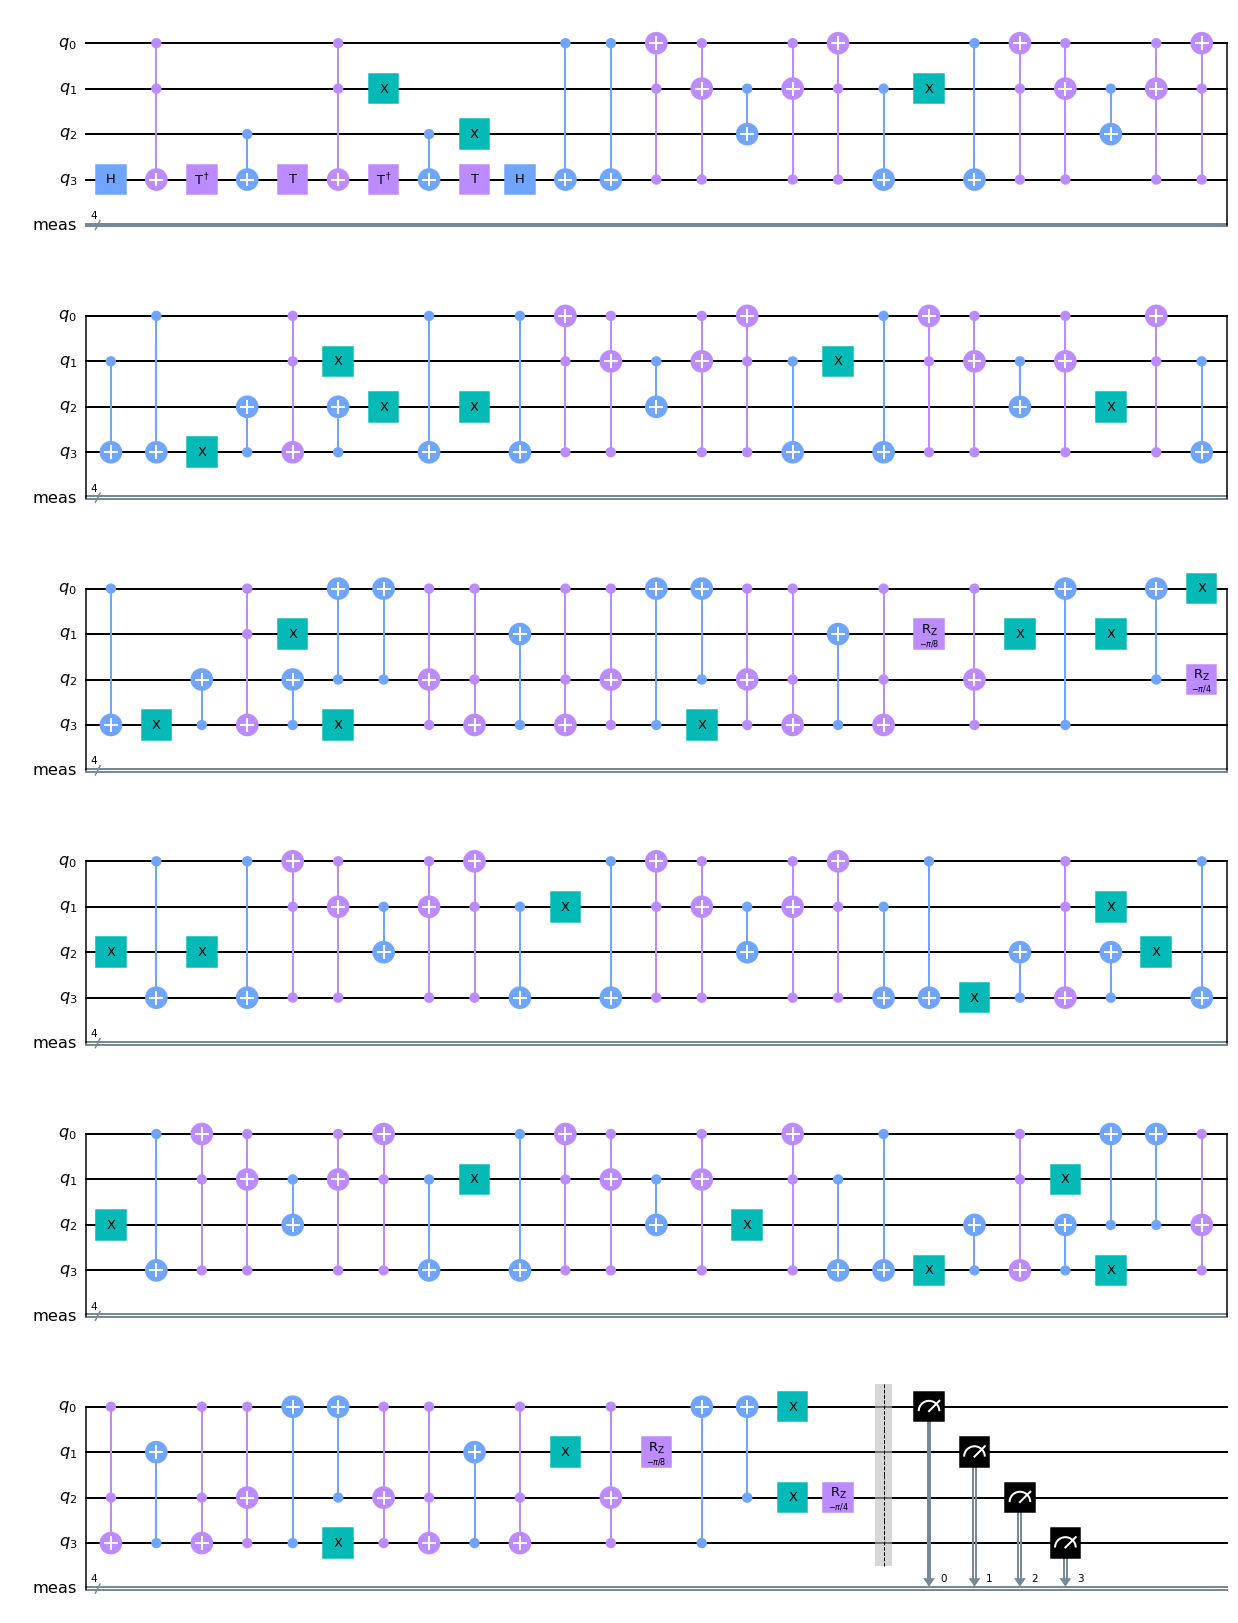

In [75]:
qc.draw(output="mpl")

In [76]:
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic


In [77]:
    qc_context = pm_context.run(qc)

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(4, 'q'), 0),
2: Qubit(QuantumRegister(4, 'q'), 1),
1: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True False
three qargs Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['01', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decompos

three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueFalse
initialized var

look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']


In [78]:
qc_context.draw()

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/sympy/core/expr.py:3951: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  deprecated_since_version="1.9").warn()


global phase: π/2
                 ┌─────────────┐┌────┐┌─────────┐                      »
        q_3 -> 0 ┤ Rz(0.32175) ├┤ √X ├┤ Rz(π/2) ├───────────────────■──»
                 └────┬───┬────┘└────┘└──┬───┬──┘┌───┐┌──────────┐┌─┴─┐»
        q_2 -> 1 ─────┤ X ├───────■──────┤ X ├───┤ X ├┤ Rz(-π/2) ├┤ X ├»
                      └─┬─┘     ┌─┴─┐    └─┬─┘   └───┘└──────────┘└───┘»
        q_1 -> 2 ───────■───────┤ X ├──────■───────────────────────────»
                                └───┘                                  »
  ancilla_0 -> 3 ──────────────────────────────────────────────────────»
                                                                       »
        q_0 -> 4 ──────────────────────────────────────────────────────»
                                                                       »
  ancilla_1 -> 5 ──────────────────────────────────────────────────────»
                                                                       »
  ancilla_2 -> 6 ──────────────────────────────────────────────────────»
                                                                       »
  ancilla_3 -> 7 ──────────────────────────────────────────────────────»
                                                                       »
  ancilla_4 -> 8 ──────────────────────────────────────────────────────»
                                                                       »
  ancilla_5 -> 9 ──────────────────────────────────────────────────────»
                                                                       »
 ancilla_6 -> 10 ──────────────────────────────────────────────────────»
                                                                       »
 ancilla_7 -> 11 ──────────────────────────────────────────────────────»
                                                                       »
 ancilla_8 -> 12 ──────────────────────────────────────────────────────»
                                                                       »
 ancilla_9 -> 13 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_10 -> 14 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_11 -> 15 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_12 -> 16 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_13 -> 17 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_14 -> 18 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_15 -> 19 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_16 -> 20 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_17 -> 21 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_18 -> 22 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_19 -> 23 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_20 -> 24 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_21 -> 25 ──────────────────────────────────────────────────────»
                                                                       »
ancilla_22 -> 26 ──────────────────────────────────────────────────────»
                                        

In [79]:
    qc_context_pulse = pm_context_pulse.run(qc)

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(4, 'q'), 0),
2: Qubit(QuantumRegister(4, 'q'), 1),
1: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True False
three qargs Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['01', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decompos

The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 2 0
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'),

look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn'

('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegist

('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegist

In [80]:
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
    qc_orign = pm_orign.run(qc)
    qc_orign_pulse = pm_orign_pulse.run(qc)
    qc_context = pm_context.run(qc)
    qc_context_pulse = pm_context_pulse.run(qc)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(4, 'q'), 0),
2: Qubit(QuantumRegister(4, 'q'), 1),
1: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in cente

The physical qubits for the toffoli are:  2 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 4 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 2 0
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 2 0
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  0 2 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 2 0
The require

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11

The physical qubits for the toffoli are:  0 1 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1) Qubit(QuantumRegister(27, 'q'), 2)
calculated tags ['00', '01', 'l1', 's'] ['21', '00', 'l1', 'p']
predecessor cx two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'l1', 's')
The physical qubits for the toffoli are:  2 1 0
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
initialized variant_tag: ('21', '00', 'l1', 'p')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00',

look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
l

three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('00', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 4 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  2 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
ccx
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('12', '01', 'l2', 's')
The physica

look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
d

intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
(

intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
i

In [ ]:
#debug qc3 and qc6!!!

In [95]:
backend = provider.get_backend('ibmq_montreal')

In [96]:
backend_monitor(backend)

ibmq_montreal
Configuration
-------------
    n_qubits: 27
    operational: True
    status_msg: active
    pending_jobs: 209
    backend_version: 1.11.13
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    credits_required: True
    url: None
    acquisition_latency: []
    online_date: 2020-06-03 04:00:00+00:00
    sample_name: family: Falcon, revision: 4
    dt: 0.2222222222222222
    dtm: 0.2222222222222222
    pulse_num_channels: 9
    timing_constraints: {'acquire_alignment': 16, 'granularity': 16, 'min_length': 64, 'pulse_alignment': 1}
    qubit_lo_range: [[4.411074508109168, 5.411074508109168], [4.3349421171563645, 5.3349421171563645], [4.482536931172541, 5.482536931172541], [4.605397470615388, 5.605397470615388], [4.503958420879818, 5.503958420879818], [4.53284519974642, 5.53284519974642], [4.450897461625369, 5.450897461625369], [4.402334186304779, 5.402334186304779], [4.408026881340031, 5.408026881340031], [4.544722180495702, 5.5

In [97]:
backend_prop = backend.properties()

In [98]:
orientation_map = orientation_map_gen(backend)

In [15]:
coupling_map = [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]

In [16]:
transpile_args = _parse_transpile_args([qc], backend = None, coupling_map = coupling_map, basis_gates = ['cx', 'rz', 'sx', 'x', 'acecr_pm'], seed_transpiler = 0, orientation_map = orientation_map)

In [17]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [18]:
print(pass_manager_config.orientation_map)

{(0, 1): 'f', (1, 0): 'b', (1, 2): 'b', (1, 4): 'f', (2, 1): 'f', (2, 3): 'b', (3, 2): 'f', (3, 5): 'b', (4, 1): 'b', (4, 7): 'f', (5, 3): 'f', (5, 8): 'f', (6, 7): 'b', (7, 4): 'b', (7, 6): 'f', (7, 10): 'b', (8, 5): 'b', (8, 9): 'b', (8, 11): 'b', (9, 8): 'f', (10, 7): 'f', (10, 12): 'b', (11, 8): 'f', (11, 14): 'f', (12, 10): 'f', (12, 13): 'f', (12, 15): 'b', (13, 12): 'b', (13, 14): 'f', (14, 11): 'b', (14, 13): 'b', (14, 16): 'b', (15, 12): 'f', (15, 18): 'f', (16, 14): 'f', (16, 19): 'f', (17, 18): 'f', (18, 15): 'b', (18, 17): 'b', (18, 21): 'b', (19, 16): 'b', (19, 20): 'b', (19, 22): 'b', (20, 19): 'f', (21, 18): 'f', (21, 23): 'b', (22, 19): 'f', (22, 25): 'b', (23, 21): 'f', (23, 24): 'f', (24, 23): 'b', (24, 25): 'f', (25, 22): 'f', (25, 24): 'b', (25, 26): 'f', (26, 25): 'b'}


In [19]:
def generate_results(qc, pass_config):
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
    qc_orign = pm_orign.run(qc)
    qc_orign_pulse = pm_orign_pulse.run(qc)
    qc_context = pm_context.run(qc)
    qc_context_pulse = pm_context_pulse.run(qc)
    return [qc_orign, qc_orign_pulse, qc_context, qc_context_pulse]

In [45]:
qc_orign.draw()

global phase: π/2
                 ┌─────────┐┌────┐┌─────────┐     ┌───┐     ┌─────────┐      »
        q_3 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├──■──┤ Rz(π/4) ├──────»
                 └──┬───┬──┘└────┘└──┬───┬──┘┌─┴─┐└─┬─┘┌─┴─┐├─────────┤┌────┐»
        q_2 -> 1 ───┤ X ├─────■──────┤ X ├───┤ X ├──■──┤ X ├┤ Rz(π/2) ├┤ √X ├»
                    └─┬─┘   ┌─┴─┐    └─┬─┘   └───┘     └───┘└─────────┘└────┘»
        q_1 -> 2 ─────■─────┤ X ├──────■─────────────────────────────────────»
                            └───┘                                            »
  ancilla_0 -> 3 ────────────────────────────────────────────────────────────»
                  ┌───────┐                                                  »
        q_0 -> 4 ─┤ Rz(π) ├──────────────────────────────────────────────────»
                  └───────┘                                                  »
  ancilla_1 -> 5 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_2 -> 6 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_3 -> 7 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_4 -> 8 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_5 -> 9 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_6 -> 10 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_7 -> 11 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_8 -> 12 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_9 -> 13 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_10 -> 14 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_11 -> 15 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_12 -> 16 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_13 -> 17 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_14 -> 18 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_15 -> 19 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_16 -> 20 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_17 -> 21 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_18 -> 22 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_19 -> 23 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_20 -> 24 ────────────────────────────────────────────────────────────»
                                

In [64]:
#generate the noise model based on selected device
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'reset', 'cx', 'sx', 'id', 'x']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('id', [5]), ('id', [6]), ('id', [7]), ('id', [8]), ('id', [9]), ('id', [10]), ('id', [11]), ('id', [12]), ('id', [13]), ('id', [14]), ('id', [15]), ('id', [16]), ('id', [17]), ('id', [18]), ('id', [19]), ('id', [20]), ('id', [21]), ('id', [22]), ('id', [23]), ('id', [24]), ('id', [25]), ('id', [26]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('sx', [5]), ('sx', [6]), ('sx', [7]), ('sx', [8]), ('sx', [9]), ('sx', [10]), ('sx', [11]), ('sx', [12]), ('sx', [13]), ('sx', [14]), ('sx', [15]), ('sx', [16]), ('sx', [17]), ('sx', [18]), ('sx', [19]), ('sx', [20]), ('sx', [21]), ('sx', [22]), ('sx', [23]), ('sx', [24]), ('sx', [2

In [67]:
#create simulators with noise model
simulator = provider.get_backend('ibmq_qasm_simulator')
state_simulator = AerSimulator(method='statevector')
state_simulator_noisy = AerSimulator(method='statevector',noise_model=noise_model)

In [85]:
qc_orign_job = execute(qc_orign, backend=state_simulator_noisy, optimization_level=0, shots=8192)

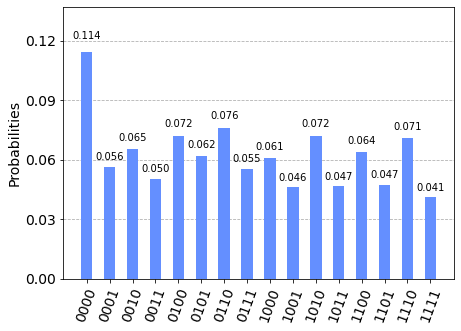

In [90]:
plot_histogram(qc_orign_job.result().get_counts())

In [87]:
qc_context_pulse_job = execute(qc_context_pulse, backend=state_simulator_noisy, optimization_level=0, shots=8192)

In [88]:
qc_context_pulse_job.result().get_counts()

{'0000': 532,
 '1001': 485,
 '0010': 539,
 '1011': 475,
 '0110': 588,
 '1100': 507,
 '0100': 524,
 '1010': 501,
 '1101': 473,
 '1111': 467,
 '0111': 497,
 '0001': 503,
 '0011': 524,
 '0101': 556,
 '1110': 519,
 '1000': 502}

In [52]:
#Changing the simulator 
backend = Aer.get_backend('unitary_simulator')


#job execution and getting the result as an object
job = execute(qc_orign, backend)
result = job.result()

#get the unitary matrix from the result object
print(result.get_unitary(qc_orign, decimals=10))
matrix = result.get_unitary(qc_orign, decimals=10)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-232298 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


QiskitError: 'Data for experiment "circuit-232298" could not be found.'

In [53]:
result

Result(backend_name='unitary_simulator', backend_version='0.9.1', qobj_id='8b0bb3e0-1914-41bd-a642-5e43feeb6da0', job_id='de522892-99a9-450e-a1c8-a559573a268e', success=False, results=[ExperimentResult(shots=0, success=False, meas_level=2, data=ExperimentResultData(), status=ERROR: Circuit circuit-232298 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method., seed_simulator=0, metadata={}, time_taken=0.0)], date=2022-04-10T19:05:00.737320, status=ERROR:  [Experiment 0] Circuit circuit-232298 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method., status=QobjHeader(backend_name='unitary_simulator', backend_version='0.9.1'), metadata={'mpi_rank': 0, 'time_taken': 0.005133907, 'max_gpu_memory_mb': 0, 'max_memory_mb': 32768, 'parallel_experiments': 1, 'num_mpi_processes': 1, 'omp_enabled': True}, time_taken=0.022692203521728516)

In [48]:
qc_orign.count_ops()

OrderedDict([('rz', 562), ('cx', 534), ('sx', 204), ('x', 25)])

In [ ]:
for i in result_lists:
    print(i.count_ops())

In [ ]:
qc2 = generate_cnx_halfdirty(19)
qc2.count_ops()

In [ ]:
result_lists2 = generate_results(qc2, pass_manager_config)

In [ ]:
for i in result_lists2:
    print(i.count_ops())

In [ ]:
qc3 = generate_cnx_log_depth(19)
qc3.count_ops()

In [ ]:
result_lists3 = generate_results(qc3, pass_manager_config)

In [ ]:
for i in result_lists3:
    print(i.count_ops())

In [54]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider
import cirq

In [55]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [57]:
orign_pulse_out = superstaq_provider.cq_compile(qc_orign_pulse, target="ibmq_montreal_qpu")

SuperstaQException: Status code: 403, Message: 'Non-retriable error making request to SuperstaQ API, Forbidden'

In [58]:
context_pulse_out = superstaq_provider.cq_compile(qc_context_pulse, target="ibmq_montreal_qpu")

SuperstaQException: Status code: 403, Message: 'Non-retriable error making request to SuperstaQ API, Forbidden'